In [28]:
import polydata
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from itertools import combinations
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import lime.lime_tabular

colors = np.array(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
features = ['x', 'y', 'z']
classes = ['p1', 'p2']
random_state = 6

0.633


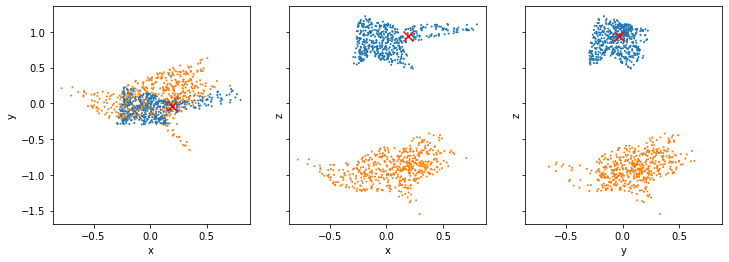

In [44]:
# An easy 3d problem
X, y, polygons, centers = polydata.make_poly(1000, 2, 3, centers=[[0,0,1], [0,0,-1]], random_state=random_state)

# xy-overlap extremely high
overlap = polydata.compute_overlap(X[:,[0,1]], polygons)
print(overlap)

# Train a neural net classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_state)
clf = MLPClassifier(max_iter=1000, random_state=random_state).fit(X_train, y_train)

# Use LIME to explain a prediction
sample = np.random.randint(0, 1000)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
    class_names=classes,
    feature_names=features,
    random_state=random_state)
exp = explainer.explain_instance(X[sample], clf.predict_proba,
                                 num_features=3, 
                                 top_labels=1)
exp.show_in_notebook()

fig, axes = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12, 4))
for ((i,j), k) in zip(combinations(range(3), 2), range(3)):
    axes[k].scatter(X[:,i], X[:,j], s=1, c=colors[y])
    axes[k].scatter(X[sample, i], X[sample, j], c='red', s=100, marker='x')
    axes[k].set_xlabel(features[i])
    axes[k].set_ylabel(features[j])

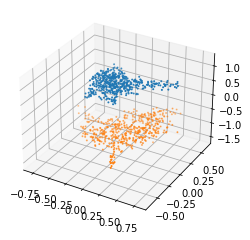

In [45]:
# Do the 3d plot
X_new = polydata.make_correlated_features(X, noise=.05, random_state=1)
ax = plt.axes(projection='3d')
ax.scatter(X_new[:,0], X_new[:,1], X_new[:,2], s=1, c=colors[y])
plt.show()

In [ ]:
# Use polydata to generate points
X, y, polygons, centers = polydata.make_poly(10000, 2, 2, min_center_distance=1.0, max_radius=2.0, min_radius=1.0, bounding_box=(-1.0,1.0), random_state=random_state)

# Overlap to customize difficulty
X, polygons = polydata.make_overlap(X, y, polygons, 0.1, 0.2)

# Train a neural net classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=random_state)
clf = MLPClassifier(max_iter=1000, random_state=random_state).fit(X_train, y_train)

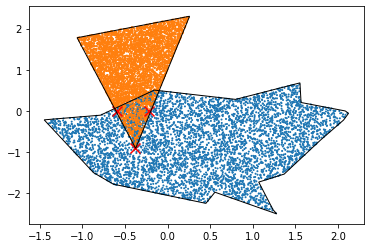

In [40]:
# Use LIME to explain some predictions
points = np.array([[-0.6, 0.0], [-0.38, -0.9], [-0.22, 0.0]])

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
    class_names=classes,
    feature_names=features,
    random_state=random_state)

fig, ax = plt.subplots()
for p in polygons:
    ax.add_patch(patches.PathPatch(p, facecolor='None'))
ax.scatter(X[:,0], X[:,1], s=1, c=colors[y])
for point in points:
    exp = explainer.explain_instance(point, clf.predict_proba,
                                 num_features=2, 
                                 top_labels=1)
    exp.show_in_notebook()
    ax.scatter(point[0], point[1], s=100, c='red', marker='x')
plt.show()

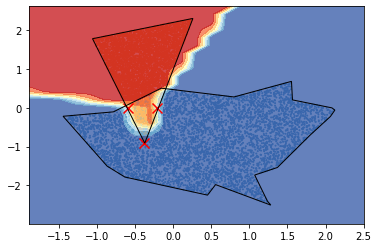

In [41]:
# Visualize the actual decision function
cm = plt.cm.RdYlBu_r

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=1, c=colors[y])
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.scatter(points[:,0], points[:,1], s=100, c='red', marker='x')
plt.show()